<a href="https://colab.research.google.com/github/Pavel184/Neural_networks/blob/Homework_lesson_4/Homework_lesson_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework_lesson_4

## Практическое задание

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

In [ ]:
from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Concatenate
import os
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model 

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [ ]:
# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
# Таблица результатов
models_results = {
    'approach': [],
    'data_augmentation': [],
#    'type_of_loss': [],
    'optimizer': [],
    'Test_loss': [],
    'Test_accuracy': []
}

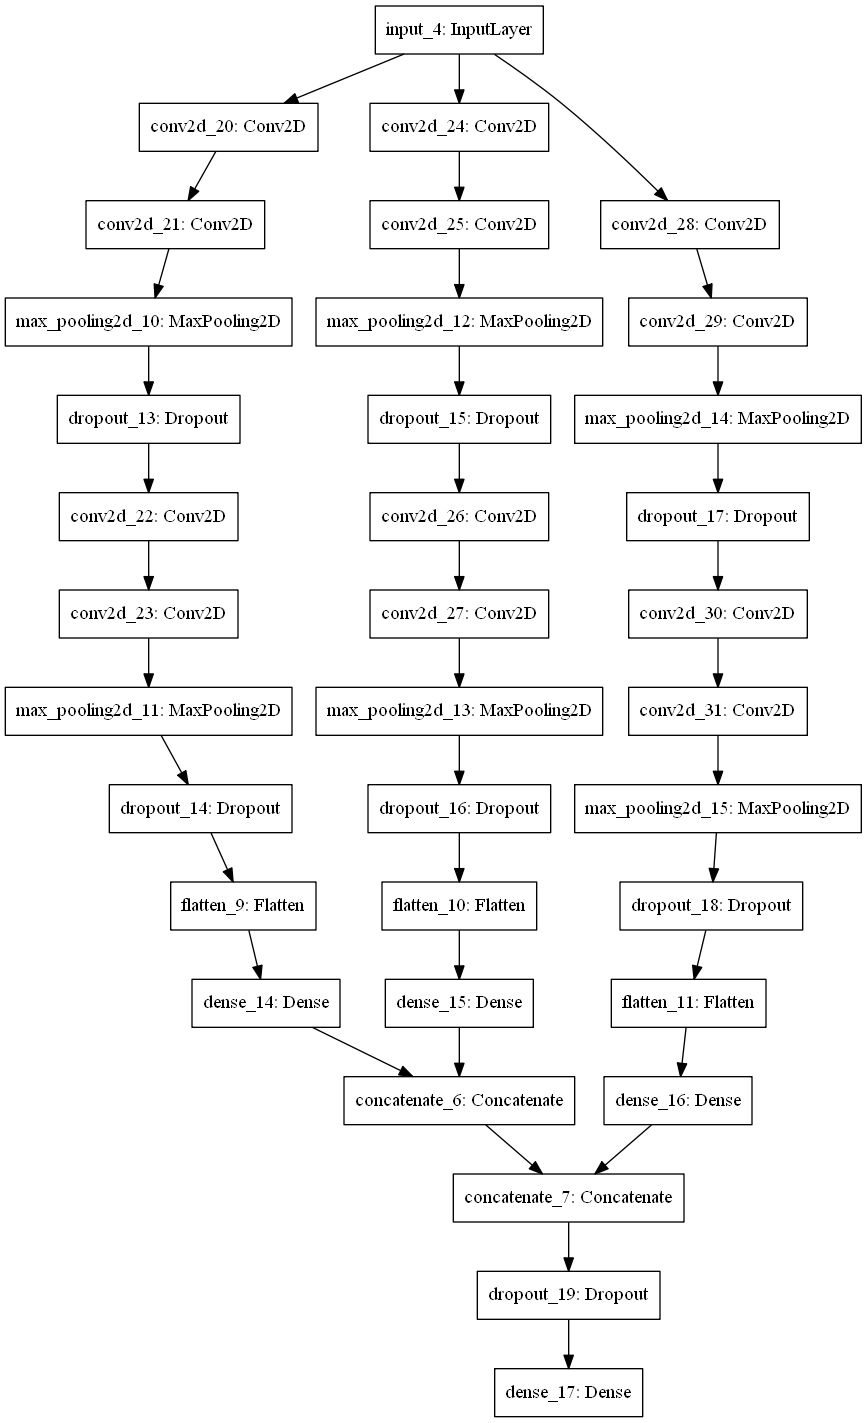

In [ ]:
# Сеть из 3-х параллельных ветвей
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x11= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
first_dense= Dense(512,activation='relu')(x11)

x22= Conv2D(32,3,activation='sigmoid',padding='same')(first_input)
x22= Conv2D(32,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Conv2D(64,3,activation='sigmoid',padding='same')(x22)
x22= Conv2D(64,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Flatten()(x22)
second_dense= Dense(512,activation='sigmoid')(x22)

x33= Conv2D(32,3,activation='elu',padding='same')(first_input)
x33= Conv2D(32,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Conv2D(64,3,activation='elu',padding='same')(x33)
x33= Conv2D(64,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Flatten()(x33)
third_dense= Dense(512,activation='elu')(x33)

merge_one = Concatenate(   )([first_dense, second_dense])
merge_two = Concatenate(   )([merge_one, third_dense])

x44= Dropout(0.5)(merge_two)
output = Dense(num_classes,activation='softmax' )(x44)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

scores = model.evaluate(x_test, y_test, verbose=1)
models_results['approach'].append('2 layers model')
models_results['data_augmentation'].append(data_augmentation)
models_results['optimizer'].append('SGD')
models_results['Test_loss'].append(scores[0])
models_results['Test_accuracy'].append(scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 442s 282ms/step - loss: 1.9089 - accuracy: 0.3023 - val_loss: 1.6988 - val_accuracy: 0.3921
Epoch 2/20
1563/1563 [==============================] - 392s 251ms/step - loss: 1.5216 - accuracy: 0.4505 - val_loss: 1.3621 - val_accuracy: 0.5120
Epoch 3/20
1563/1563 [==============================] - 389s 249ms/step - loss: 1.3532 - accuracy: 0.5188 - val_loss: 1.2375 - val_accuracy: 0.5531
Epoch 4/20
1563/1563 [==============================] - 388s 249ms/step - loss: 1.2444 - accuracy: 0.5606 - val_loss: 1.1576 - val_accuracy: 0.5883
Epoch 5/20
1563/1563 [==============================] - 389s 249ms/step - loss: 1.1589 - accuracy: 0.5917 - val_loss: 1.0516 - val_accuracy: 0.6303
Epoch 6/20
1563/1563 [==============================] - 389s 249ms/step - loss: 1.0954 - accuracy: 0.6134 - val_loss: 1.0093 - val_accuracy: 0.6532
Epoch 7/20
1563/1563 [==============================] - 388s 248ms/step - loss

In [ ]:
data_augmentation = True

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

scores = model.evaluate(x_test, y_test, verbose=1)
models_results['approach'].append('2 layers model')
models_results['data_augmentation'].append(data_augmentation)
models_results['optimizer'].append('SGD')
models_results['Test_loss'].append(scores[0])
models_results['Test_accuracy'].append(scores[1])

Использование data augmentation в реальном времени
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1563/1563 [==============================] - 398s 255ms/step - loss: 0.9279 - accuracy: 0.6748 - val_loss: 0.8406 - val_accuracy: 0.7099
Epoch 2/20
1563/1563 [==============================] - 417s 266ms/step - loss: 0.9090 - accuracy: 0.6812 - val_loss: 0.8518 - val_accuracy: 0.7123
Epoch 3/20
1563/1563 [==============================] - 401s 257ms/step - loss: 0.8899 - accuracy: 0.6876 - val_loss: 0.7802 - val_accuracy: 0.7304
Epoch 4/20
1563/1563 [==============================] - 402s 257ms/step - loss: 0.8760 - accuracy: 0.6925 - val_loss: 0.8236 - val_accuracy: 0.7145
Epoch 5/20
1563/1563 [==============================] - 403s 258ms/step - loss: 0.8652 - accuracy: 0.6952 - val_loss: 0.7801 - val_accuracy: 0.7353
Epoch 6/20
1563/1563 [==============================] - 403s 258ms/step - loss: 0.8572 - accuracy: 0.6991 - val_loss: 0.7543 - val_ac

In [ ]:
# Таблица результатов
models_results_2 = {
    'approach': [],
    'data_augmentation': [],
#    'type_of_loss': [],
    'optimizer': [],
    'Test_loss': [],
    'Test_accuracy': []
}

In [ ]:
# Создание списка оптимайзеров
ada_grad = tf.keras.optimizers.Adagrad()
rmsprop = tf.keras.optimizers.RMSprop()
sgd = tf.keras.optimizers.SGD()
ftrl = tf.keras.optimizers.Ftrl()
optimizer = [ada_grad, rmsprop, sgd, ftrl]
data_augmentations = [False, True]

In [ ]:
# Сеть из 3-х параллельных ветвей с разными значениями optimizer с настройками по умолчанию
for opt in optimizer:
    for data_augmentation in data_augmentations:
        first_input = Input(shape=x_train.shape[1:])
        x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
        x11= Conv2D(32,3,activation='relu')(x11)
        x11= MaxPooling2D(pool_size=(2, 2))(x11)
        x11= Dropout(0.25)(x11)
        x11= Conv2D(64,3,activation='relu',padding='same')(x11)
        x11= Conv2D(64,3,activation='relu')(x11)
        x11= MaxPooling2D(pool_size=(2, 2))(x11)
        x11= Dropout(0.25)(x11)
        x11= Flatten()(x11)
        first_dense= Dense(512,activation='relu')(x11)

        x22= Conv2D(32,3,activation='sigmoid',padding='same')(first_input)
        x22= Conv2D(32,3,activation='sigmoid')(x22)
        x22= MaxPooling2D(pool_size=(2, 2))(x22)
        x22= Dropout(0.25)(x22)
        x22= Conv2D(64,3,activation='sigmoid',padding='same')(x22)
        x22= Conv2D(64,3,activation='sigmoid')(x22)
        x22= MaxPooling2D(pool_size=(2, 2))(x22)
        x22= Dropout(0.25)(x22)
        x22= Flatten()(x22)
        second_dense= Dense(512,activation='sigmoid')(x22)

        x33= Conv2D(32,3,activation='elu',padding='same')(first_input)
        x33= Conv2D(32,3,activation='elu')(x33)
        x33= MaxPooling2D(pool_size=(2, 2))(x33)
        x33= Dropout(0.25)(x33)
        x33= Conv2D(64,3,activation='elu',padding='same')(x33)
        x33= Conv2D(64,3,activation='elu')(x33)
        x33= MaxPooling2D(pool_size=(2, 2))(x33)
        x33= Dropout(0.25)(x33)
        x33= Flatten()(x33)
        third_dense= Dense(512,activation='elu')(x33)

        merge_one = Concatenate(   )([first_dense, second_dense])
        merge_two = Concatenate(   )([merge_one, third_dense])

        x44= Dropout(0.5)(merge_two)
        output = Dense(num_classes,activation='softmax' )(x44)

        model = Model(inputs=first_input, outputs=output)
        model.compile(optimizer=opt, loss='categorical_crossentropy',
                          metrics=['accuracy'])

        if not data_augmentation:
            print('Не используется data augmentation')
            model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_data=(x_test, y_test),
                      shuffle=True)
        else:
            print('Использование data augmentation в реальном времени')
            # Препроцессинг и data augmentation в реальном времени:
            datagen = ImageDataGenerator(
                featurewise_center=False,
                samplewise_center=False,
                featurewise_std_normalization=False,
                samplewise_std_normalization=False,
                zca_whitening=False, 
                zca_epsilon=1e-06, 
                rotation_range=5, 
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0., 
                zoom_range=0., 
                channel_shift_range=0.,
                fill_mode='nearest',
                cval=0.,
                horizontal_flip=True,
                vertical_flip=False,
                rescale=None,
                preprocessing_function=None,
                data_format=None,
                validation_split=0.0)

            # запуск data augmentation через fit_generator
            model.fit_generator(datagen.flow(x_train, y_train,
                                             batch_size=batch_size),
                                epochs=epochs,
                                validation_data=(x_test, y_test),
                                workers=4)

        # проверка работы обученной модели
        scores = model.evaluate(x_test, y_test, verbose=1)
        models_results_2['approach'].append('2 layers model')
        models_results_2['data_augmentation'].append(data_augmentation)
        models_results_2['optimizer'].append(opt)
        models_results_2['Test_loss'].append(scores[0])
        models_results_2['Test_accuracy'].append(scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 440s 282ms/step - loss: 2.1876 - accuracy: 0.1833 - val_loss: 1.9448 - val_accuracy: 0.3242
Epoch 2/20
1563/1563 [==============================] - 411s 263ms/step - loss: 1.9261 - accuracy: 0.2957 - val_loss: 1.7550 - val_accuracy: 0.3859
Epoch 3/20
1563/1563 [==============================] - 400s 256ms/step - loss: 1.7850 - accuracy: 0.3551 - val_loss: 1.6762 - val_accuracy: 0.4024
Epoch 4/20
1563/1563 [==============================] - 403s 258ms/step - loss: 1.7141 - accuracy: 0.3819 - val_loss: 1.6325 - val_accuracy: 0.4198
Epoch 5/20
1563/1563 [==============================] - 401s 257ms/step - loss: 1.6650 - accuracy: 0.4015 - val_loss: 1.5877 - val_accuracy: 0.4323
Epoch 6/20
1563/1563 [==============================] - 401s 256ms/step - loss: 1.6295 - accuracy: 0.4125 - val_loss: 1.5579 - val_accuracy: 0.4440
Epoch 7/20
1563/1563 [==============================] - 400s 256ms/step - loss

In [ ]:
# Итоговая таблица
df_2 = pd.DataFrame(data=models_results_2).sort_values('Test_accuracy', ascending=False)
df_2.head(20)

,approach,data_augmentation,optimizer,Test_loss,Test_accuracy
4,2 layers model,False,<tensorflow.python.keras.optimizer_v2.gradient...,0.711197,0.7521
3,2 layers model,True,<tensorflow.python.keras.optimizer_v2.rmsprop....,0.819317,0.7286
5,2 layers model,True,<tensorflow.python.keras.optimizer_v2.gradient...,0.831334,0.7116
2,2 layers model,False,<tensorflow.python.keras.optimizer_v2.rmsprop....,1.082366,0.7055
0,2 layers model,False,<tensorflow.python.keras.optimizer_v2.adagrad....,1.319507,0.5285
1,2 layers model,True,<tensorflow.python.keras.optimizer_v2.adagrad....,1.405893,0.4949
6,2 layers model,False,<tensorflow.python.keras.optimizer_v2.ftrl.Ftr...,2.302684,0.1000
7,2 layers model,True,<tensorflow.python.keras.optimizer_v2.ftrl.Ftr...,2.302614,0.1000


Из таблицы результатов видно, что самая высокая accuracy(0.7521) у модели с оптимазером SGD

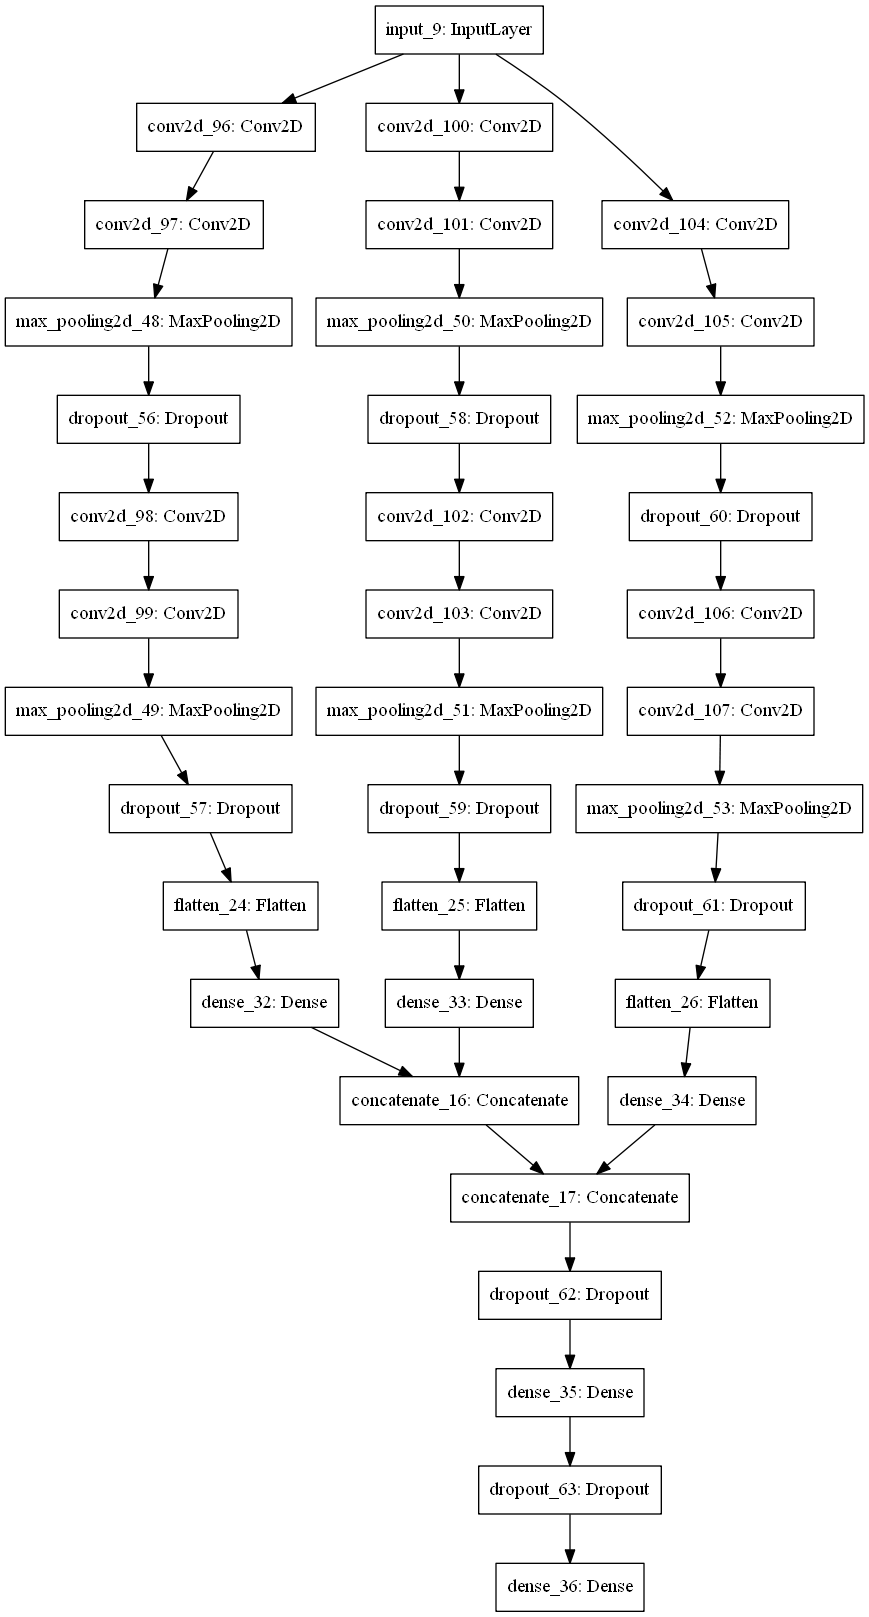

In [ ]:
# Сеть из 3-х параллельных ветвей с дополнительным полносвязным слоем на выходе
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x11= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
first_dense= Dense(512,activation='relu')(x11)

x22= Conv2D(32,3,activation='sigmoid',padding='same')(first_input)
x22= Conv2D(32,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Conv2D(64,3,activation='sigmoid',padding='same')(x22)
x22= Conv2D(64,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Flatten()(x22)
second_dense= Dense(512,activation='sigmoid')(x22)

x33= Conv2D(32,3,activation='elu',padding='same')(first_input)
x33= Conv2D(32,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Conv2D(64,3,activation='elu',padding='same')(x33)
x33= Conv2D(64,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Flatten()(x33)
third_dense= Dense(512,activation='elu')(x33)

merge_one = Concatenate(   )([first_dense, second_dense])
merge_two = Concatenate(   )([merge_one, third_dense])

x44= Dropout(0.25)(merge_two)
x44= Dense(512,activation='elu')(x44)
x44= Dropout(0.5)(x44)
output = Dense(num_classes,activation='softmax' )(x44)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 428s 274ms/step - loss: 1.9122 - accuracy: 0.3044 - val_loss: 1.5681 - val_accuracy: 0.4360
Epoch 2/20
1563/1563 [==============================] - 439s 281ms/step - loss: 1.5203 - accuracy: 0.4529 - val_loss: 1.3355 - val_accuracy: 0.5213
Epoch 3/20
1563/1563 [==============================] - 410s 262ms/step - loss: 1.3561 - accuracy: 0.5183 - val_loss: 1.1997 - val_accuracy: 0.5742
Epoch 4/20
1563/1563 [==============================] - 411s 263ms/step - loss: 1.2366 - accuracy: 0.5622 - val_loss: 1.2027 - val_accuracy: 0.5735
Epoch 5/20
1563/1563 [==============================] - 411s 263ms/step - loss: 1.1485 - accuracy: 0.5973 - val_loss: 1.0757 - val_accuracy: 0.6158
Epoch 6/20
1563/1563 [==============================] - 418s 268ms/step - loss: 1.0860 - accuracy: 0.6194 - val_loss: 1.0395 - val_accuracy: 0.6389
Epoch 7/20
1563/1563 [==============================] - 410s 262ms/step - loss

Из результата видно, что дополнительный полносвязный слой помог немного поднять accuracy(0.7709)

In [ ]:
# Таблица результатов
models_results_3 = {
    'approach': [],
    'data_augmentation': [],
#    'type_of_loss': [],
    'optimizer': [],
    'Test_loss': [],
    'Test_accuracy': []
}

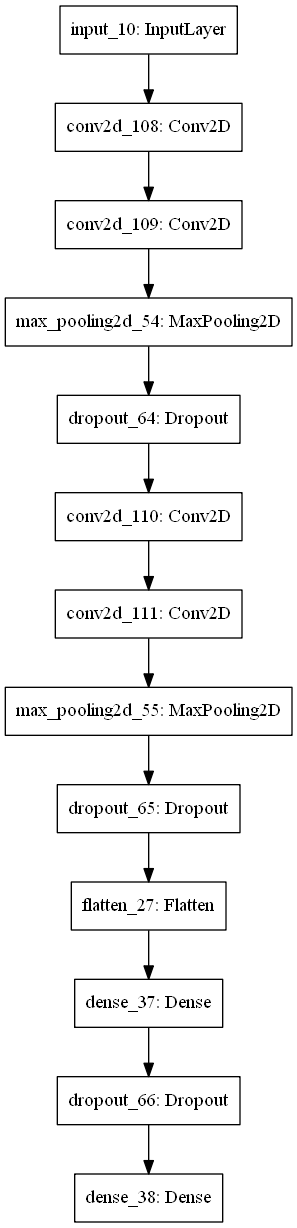

In [ ]:
# Сеть из 1й ветви
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x11= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
x11= Dense(512,activation='relu')(x11)
x11= Dropout(0.5)(x11)
first_dense = Dense(num_classes,activation='softmax' )(x11)

model = Model(inputs=first_input, outputs=first_dense)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
models_results_3['approach'].append('1 line model')
models_results_3['data_augmentation'].append(data_augmentation)
models_results_3['optimizer'].append('SGD')
models_results_3['Test_loss'].append(scores[0])
models_results_3['Test_accuracy'].append(scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 142s 91ms/step - loss: 2.1007 - accuracy: 0.2196 - val_loss: 1.9238 - val_accuracy: 0.3107
Epoch 2/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8250 - accuracy: 0.3431 - val_loss: 1.6620 - val_accuracy: 0.3928
Epoch 3/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6311 - accuracy: 0.4059 - val_loss: 1.5173 - val_accuracy: 0.4465
Epoch 4/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.4934 - accuracy: 0.4584 - val_loss: 1.4476 - val_accuracy: 0.4806
Epoch 5/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3987 - accuracy: 0.4922 - val_loss: 1.3132 - val_accuracy: 0.5253
Epoch 6/20
1563/1563 [==============================] - 141s 90ms/step - loss: 1.3242 - accuracy: 0.5226 - val_loss: 1.2400 - val_accuracy: 0.5619
Epoch 7/20
1563/1563 [==============================] - 142s 91ms/step - loss: 1.264

KeyError: 'type_of_loss'

Модель с одной ветвью дала accuracy ниже, чем модель с 3-мя ветвями(0.7272)

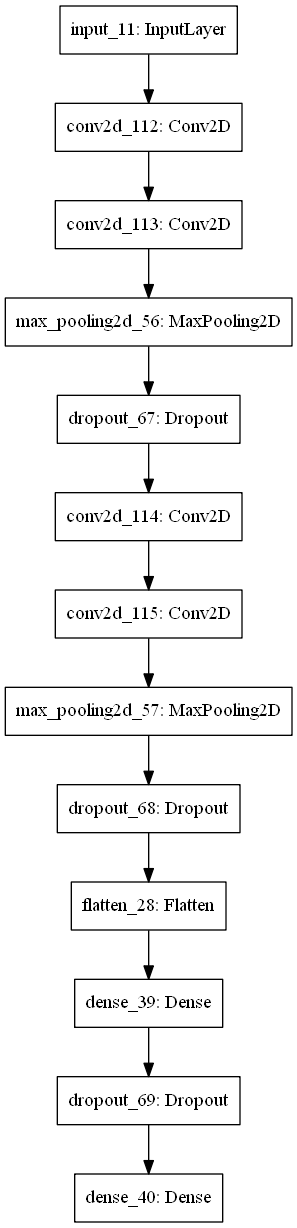

In [ ]:
# # Сеть из 1й ветви с удвоенным количеством нейронов
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(64,3,activation='relu',padding='same')(first_input)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(128,3,activation='relu',padding='same')(x11)
x11= Conv2D(128,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
x11= Dense(1024,activation='relu')(x11)
x11= Dropout(0.5)(x11)
first_dense = Dense(num_classes,activation='softmax' )(x11)

model = Model(inputs=first_input, outputs=first_dense)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
#scores = model.evaluate(x_test, y_test, verbose=1)
models_results_3['approach'].append('Double qty of neurons')
models_results_3['data_augmentation'].append(data_augmentation)
#models_results_3['type_of_loss'].append(loss)
models_results_3['optimizer'].append('SGD')
models_results_3['Test_loss'].append(scores[0])
models_results_3['Test_accuracy'].append(scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 319s 204ms/step - loss: 2.0509 - accuracy: 0.2421 - val_loss: 1.9060 - val_accuracy: 0.3261
Epoch 2/20
1563/1563 [==============================] - 317s 203ms/step - loss: 1.6979 - accuracy: 0.3855 - val_loss: 1.5126 - val_accuracy: 0.4497
Epoch 3/20
1563/1563 [==============================] - 329s 210ms/step - loss: 1.5044 - accuracy: 0.4540 - val_loss: 1.3929 - val_accuracy: 0.4897
Epoch 4/20
1563/1563 [==============================] - 345s 221ms/step - loss: 1.3775 - accuracy: 0.5013 - val_loss: 1.3186 - val_accuracy: 0.5364
Epoch 5/20
1563/1563 [==============================] - 351s 225ms/step - loss: 1.2799 - accuracy: 0.5413 - val_loss: 1.1561 - val_accuracy: 0.5923
Epoch 6/20
1563/1563 [==============================] - 357s 228ms/step - loss: 1.1931 - accuracy: 0.5781 - val_loss: 1.0972 - val_accuracy: 0.6087
Epoch 7/20
1563/1563 [==============================] - 348s 223ms/step - loss

Модель с удвоенным количеством нейронов дала accuracy немного выше предыдущей модели(0.7466)

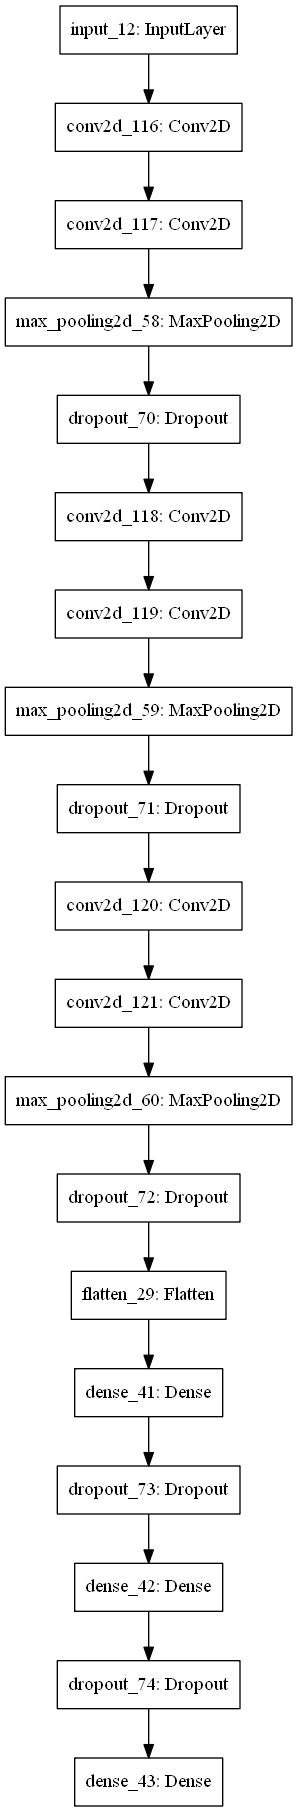

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x11= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(128,3,activation='relu',padding='same')(x11)
x11= Conv2D(128,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
x11= Dense(512,activation='relu')(x11)
x11= Dropout(0.25)(x11)
x11= Dense(512,activation='relu')(x11)
x11= Dropout(0.5)(x11)
first_dense = Dense(num_classes,activation='softmax' )(x11)

model = Model(inputs=first_input, outputs=first_dense)
ada_grad = tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit
    #datagen.fit(x_train)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
models_results_3['approach'].append('more layers model')
models_results_3['data_augmentation'].append(data_augmentation)
models_results_3['optimizer'].append('SGD')
models_results_3['Test_loss'].append(scores[0])
models_results_3['Test_accuracy'].append(scores[1])

Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 190s 121ms/step - loss: 2.2374 - accuracy: 0.1492 - val_loss: 2.1808 - val_accuracy: 0.1805
Epoch 2/20
1563/1563 [==============================] - 204s 130ms/step - loss: 2.0679 - accuracy: 0.2203 - val_loss: 2.3451 - val_accuracy: 0.1408
Epoch 3/20
1563/1563 [==============================] - 204s 130ms/step - loss: 1.8943 - accuracy: 0.2853 - val_loss: 1.9608 - val_accuracy: 0.2853
Epoch 4/20
1563/1563 [==============================] - 199s 128ms/step - loss: 1.7223 - accuracy: 0.3561 - val_loss: 1.6801 - val_accuracy: 0.3872
Epoch 5/20
1563/1563 [==============================] - 193s 123ms/step - loss: 1.5879 - accuracy: 0.4102 - val_loss: 1.4301 - val_accuracy: 0.4755
Epoch 6/20
1563/1563 [==============================] - 187s 120ms/step - loss: 1.4867 - accuracy: 0.4543 - val_loss: 1.3656 - val_accuracy: 0.5063
Epoch 7/20
1563/1563 [==============================] - 194s 124ms/step - loss

NameError: name 'models_results' is not defined

Увеличение количества слоёв свёртки не привело к росту accuracy

In [ ]:
# Итоговая таблица
df_3 = pd.DataFrame(data=models_results_3).sort_values('Test_accuracy', ascending=False)
df_3.head(20)

,approach,data_augmentation,optimizer,Test_loss,Test_accuracy
1,"2 layers model, more neurons",False,SGD,0.746534,0.7467
2,3 layers model,False,SGD,0.768201,0.7329
0,2 layers model,False,SGD,0.790102,0.7273


Лучший результат у моделей с одной ветвью получился у модели с большим количеством нейронов

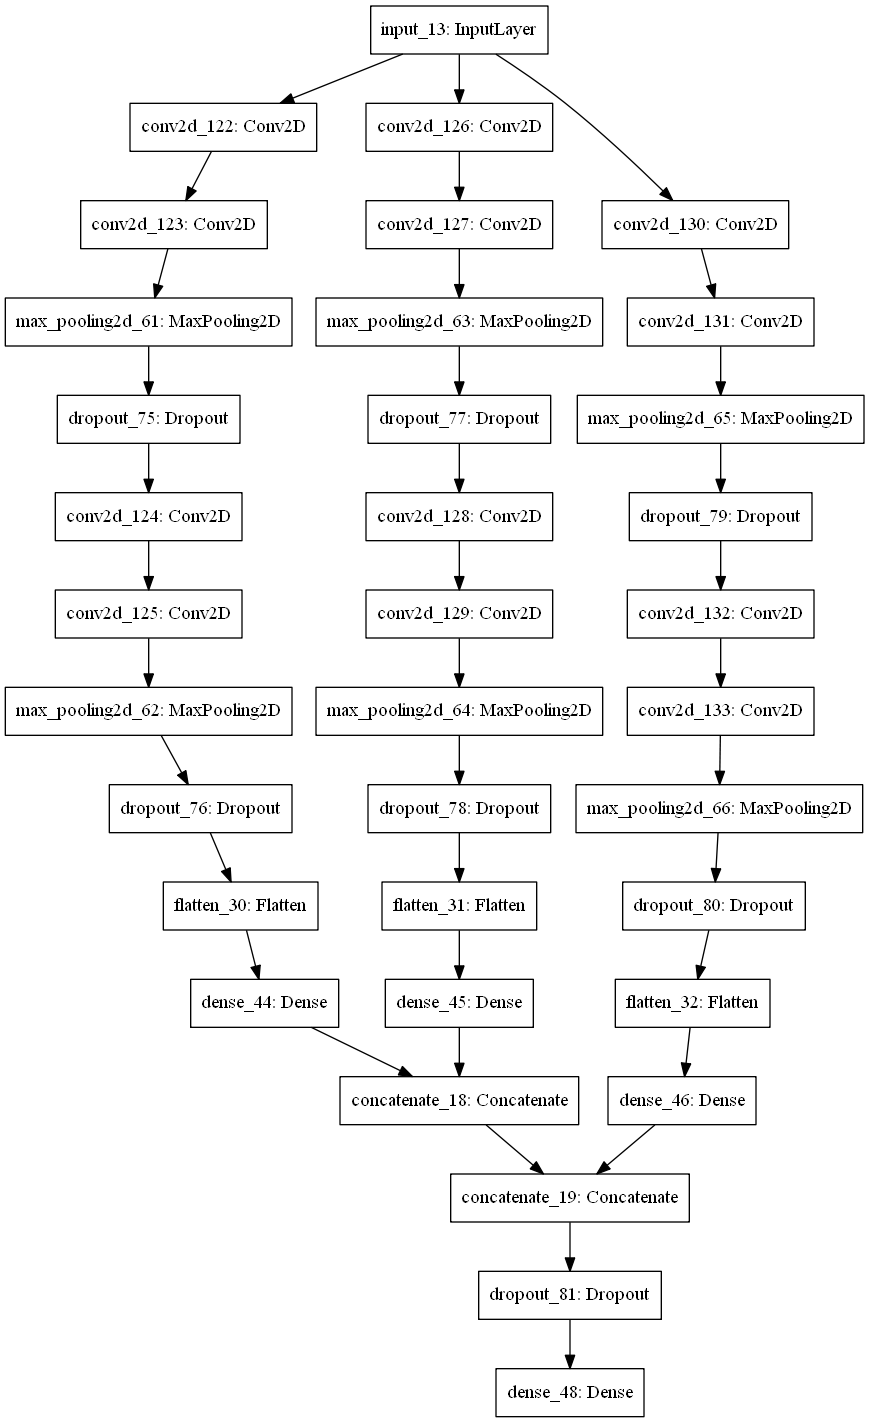

In [ ]:
# Модель с 3-мя ветвями, но разным количеством нейронов
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x11= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x11= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x11)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
first_dense= Dense(512,activation='relu')(x11)

x22= Conv2D(8,3,activation='sigmoid',padding='same')(first_input)
x22= Conv2D(8,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Conv2D(16,3,activation='sigmoid',padding='same')(x22)
x22= Conv2D(16,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Flatten()(x22)
second_dense= Dense(512,activation='sigmoid')(x22)

x33= Conv2D(128,3,activation='elu',padding='same')(first_input)
x33= Conv2D(128,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Conv2D(256,3,activation='elu',padding='same')(x33)
x33= Conv2D(256,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Flatten()(x33)
third_dense= Dense(512,activation='elu')(x33)

merge_one = Concatenate(   )([first_dense, second_dense])
merge_two = Concatenate(   )([merge_one, third_dense])

x44= Dropout(0.25)(merge_two)
last_dense= Dense(512,activation='relu')(x44)
output = Dense(num_classes,activation='softmax' )(x44)

model = Model(inputs=first_input, outputs=output)
model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Не используется data augmentation
Epoch 1/20
1563/1563 [==============================] - 1081s 691ms/step - loss: 1.8392 - accuracy: 0.3310 - val_loss: 1.6100 - val_accuracy: 0.4187
Epoch 2/20
1563/1563 [==============================] - 1075s 688ms/step - loss: 1.4804 - accuracy: 0.4689 - val_loss: 1.3636 - val_accuracy: 0.5109
Epoch 3/20
1563/1563 [==============================] - 1062s 680ms/step - loss: 1.2852 - accuracy: 0.5440 - val_loss: 1.1853 - val_accuracy: 0.5909
Epoch 4/20
1563/1563 [==============================] - 1057s 676ms/step - loss: 1.1470 - accuracy: 0.5944 - val_loss: 1.0633 - val_accuracy: 0.6304
Epoch 5/20
1563/1563 [==============================] - 1105s 707ms/step - loss: 1.0439 - accuracy: 0.6339 - val_loss: 0.9833 - val_accuracy: 0.6619
Epoch 6/20
1563/1563 [==============================] - 1065s 682ms/step - loss: 0.9608 - accuracy: 0.6630 - val_loss: 0.9114 - val_accuracy: 0.6803
Epoch 7/20
1563/1563 [==============================] - 1054s 674ms/step

Разным количеством нейронов в параллельных ветвяз удалось немного поднять accuracy(0.7803)

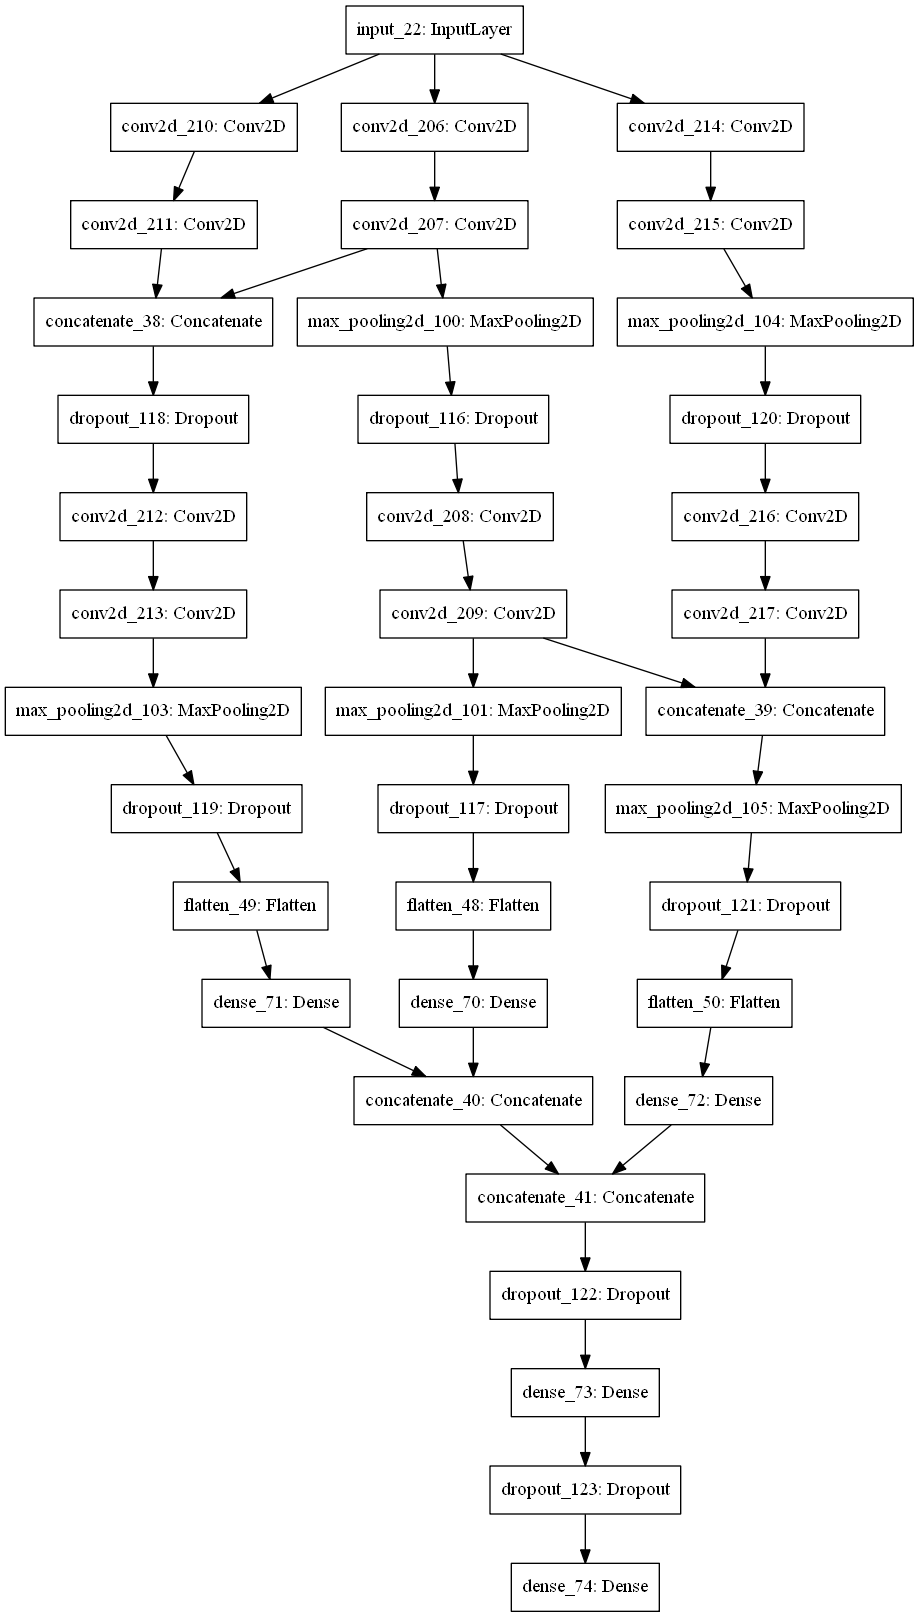

In [ ]:
first_input = Input(shape=x_train.shape[1:])
x11= Conv2D(32,3,activation='relu',padding='same')(first_input)
x12= Conv2D(32,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x12)
x11= Dropout(0.25)(x11)
x11= Conv2D(64,3,activation='relu',padding='same')(x11)
x13= Conv2D(64,3,activation='relu')(x11)
x11= MaxPooling2D(pool_size=(2, 2))(x13)
x11= Dropout(0.25)(x11)
x11= Flatten()(x11)
first_dense= Dense(512,activation='relu')(x11)

x22= Conv2D(8,3,activation='sigmoid',padding='same')(first_input)
x22= Conv2D(8,3,activation='sigmoid')(x22)
x23 = Concatenate(   )([x22, x12])
x22= MaxPooling2D(pool_size=(2, 2))(x23)
x22= Dropout(0.25)(x23)
x22= Conv2D(16,3,activation='sigmoid',padding='same')(x22)
x22= Conv2D(16,3,activation='sigmoid')(x22)
x22= MaxPooling2D(pool_size=(2, 2))(x22)
x22= Dropout(0.25)(x22)
x22= Flatten()(x22)
second_dense= Dense(512,activation='sigmoid')(x22)

x33= Conv2D(128,3,activation='elu',padding='same')(first_input)
x33= Conv2D(128,3,activation='elu')(x33)
x33= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x33)
x33= Conv2D(256,3,activation='elu',padding='same')(x33)
x33= Conv2D(256,3,activation='elu')(x33)
x33 = Concatenate(   )([x33, x13])
x35= MaxPooling2D(pool_size=(2, 2))(x33)
x33= Dropout(0.25)(x35)
x33= Flatten()(x33)
third_dense= Dense(512,activation='elu')(x33)

merge_one = Concatenate(   )([first_dense, second_dense])
merge_two = Concatenate(   )([merge_one, third_dense])

x44= Dropout(0.25)(merge_two)
x44= Dense(512,activation='relu')(x44)
x44= Dropout(0.5)(x44)
output = Dense(num_classes,activation='softmax' )(x44)

model = Model(inputs=first_input, outputs=output)

model.compile(optimizer='SGD', loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model,'model_stek.png')

In [ ]:
epochs = 30

In [ ]:
data_augmentation = False

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Не используется data augmentation
Epoch 1/30
1563/1563 [==============================] - 1193s 763ms/step - loss: 1.9917 - accuracy: 0.2621 - val_loss: 1.6539 - val_accuracy: 0.4040
Epoch 2/30
1563/1563 [==============================] - 1181s 755ms/step - loss: 1.6152 - accuracy: 0.4150 - val_loss: 1.4576 - val_accuracy: 0.4698
Epoch 3/30
1563/1563 [==============================] - 1185s 758ms/step - loss: 1.4418 - accuracy: 0.4814 - val_loss: 1.2798 - val_accuracy: 0.5419
Epoch 4/30
1563/1563 [==============================] - 1193s 763ms/step - loss: 1.2989 - accuracy: 0.5356 - val_loss: 1.1587 - val_accuracy: 0.5870
Epoch 5/30
1563/1563 [==============================] - 1185s 758ms/step - loss: 1.1894 - accuracy: 0.5774 - val_loss: 1.0618 - val_accuracy: 0.6223
Epoch 6/30
1563/1563 [==============================] - 1182s 757ms/step - loss: 1.1009 - accuracy: 0.6101 - val_loss: 0.9929 - val_accuracy: 0.6463
Epoch 7/30
1563/1563 [==============================] - 1180s 755ms/step

Дополнительный перенос информации между ветвями помог немного поднять accuracy(0.7944)

In [ ]:
epochs = 10
data_augmentation = True

if not data_augmentation:
    print('Не используется data augmentation')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    # запуск data augmentation через fit_generator
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)



# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Использование data augmentation в реальном времени
Epoch 1/10
1563/1563 [==============================] - 1215s 777ms/step - loss: 0.8064 - accuracy: 0.7245 - val_loss: 0.6561 - val_accuracy: 0.7755
Epoch 2/10
1563/1563 [==============================] - 1220s 780ms/step - loss: 0.7459 - accuracy: 0.7424 - val_loss: 0.6129 - val_accuracy: 0.7931
Epoch 3/10
1563/1563 [==============================] - 1220s 781ms/step - loss: 0.7187 - accuracy: 0.7526 - val_loss: 0.7069 - val_accuracy: 0.7622
Epoch 4/10
1563/1563 [==============================] - 1195s 765ms/step - loss: 0.6960 - accuracy: 0.7601 - val_loss: 0.6119 - val_accuracy: 0.7889
Epoch 5/10
1563/1563 [==============================] - 1231s 788ms/step - loss: 0.6719 - accuracy: 0.7673 - val_loss: 0.6114 - val_accuracy: 0.7937
Epoch 6/10
1563/1563 [==============================] - 1214s 776ms/step - loss: 0.6648 - accuracy: 0.7668 - val_loss: 0.5792 - val_accuracy: 0.8018
Epoch 7/10
1563/1563 [==============================] -

Дообучение модели на аугментированных данных помогло поднять accuracy(0.8125)

### Вывод: Увеличение глубины сети имеет смысл когда на входе данные большого размера, так же увеличение количества полносвязных выходных слоёв имеет смысл, когда модель генерирует достаточно признаков. Увеличение ширины сети(количества нейронов/ветвей) положительно влияет на модель, т.к. генерируется больше признаков, но это работает только до определённого размера, а так же повышает вычислительную сложность.